# 图像分割综述

图像分割(segmentation)指的是将数字图像划分成多个图像子区域的过程。

在实际场景中具有诸多重要应用

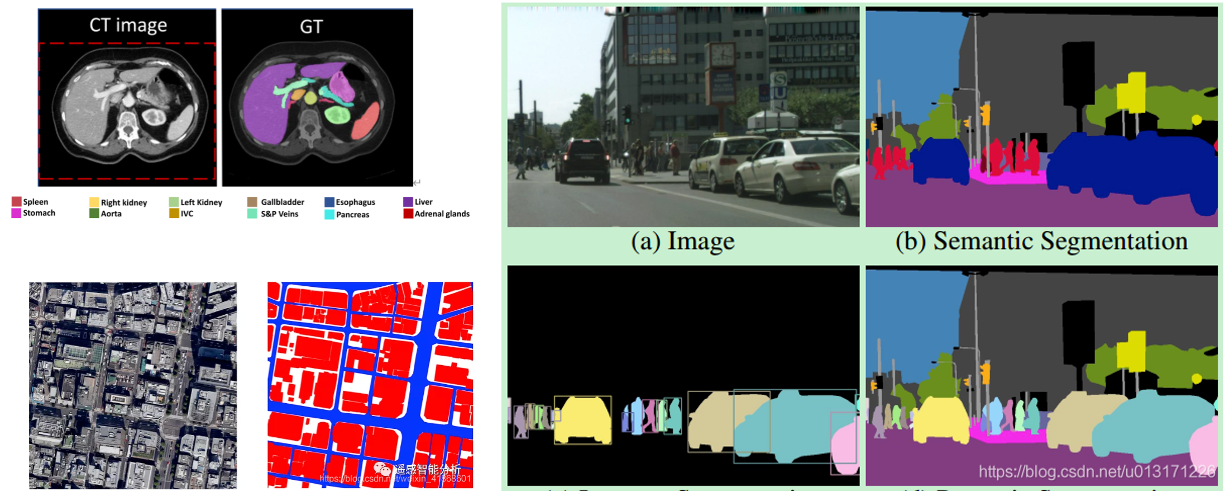

在广义的图像分割中，传统方法和深度方法对于分割有不同的定义。

* 传统方法：对于图像进行区域划分，核心问题在于：**区域间差异性、区域内相似性**。本质上属于一个聚类问题

* 深度方法：对于图像进行像素级分类，核心问题在于：**逐像素分类**，本质上是一个分类问题

实际上，在深度方法中，对于语义分割又有更加细分的问题定义

* 语义分割：将前景与后景区分开来

* 实例分割：将不同的物体分类分割

本课程会简要介绍传统的图像分割算法，更多注重于介绍语义分割问题。

## 图像分割的传统方法

在传统方法时代，主要是基于初等图像特征对图像的像素进行划分，本质上，是对一簇像素进行合并的过程。

主要的思路包括：

* 阈值法：根据不同的像素值等级，划分出不同的方法。代表性方法为直方图法

* 边缘法：根据梯度进行区域划分。

* 区域法：以像素为起点，不断合并周围像素成为更大的区域。代表性方法: 区域生长，分水岭算法

* 轮廓法：设定一个初始轮廓，定义函数值对其进行优化逼近物体的真实轮廓。

* 图论法：将区域视为一个整体，不断进行切割。直到切割不动了(满足阈值)。


### 区域法

**区域生长算法**

1. 选择一个像素作为中心点；
2. 从种子向外扩张，将满足条件的点逐渐地加入种子集合中；
3. 执行第二步，直到没有新的点加入集合。



### 分水岭算法

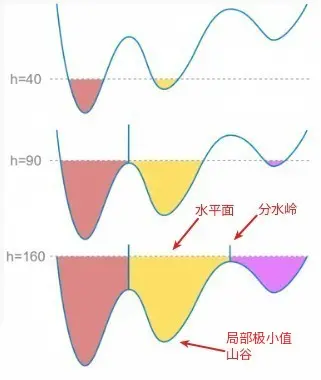

1. 找到最小灰度值像素点，让threshold从最小值开始增长
2. 增长过程中，如果邻阈像素没有被分类，则加入像素值
3. 上述过程直到在边界相遇，从而对像素进行分区

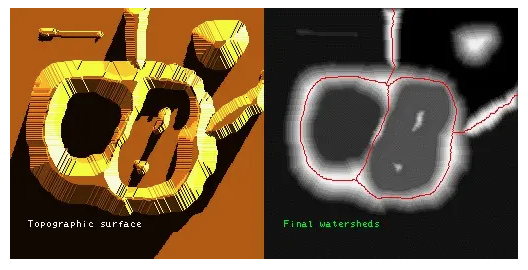

### 图论法

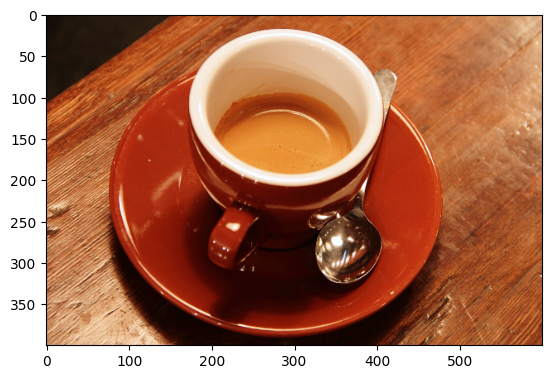

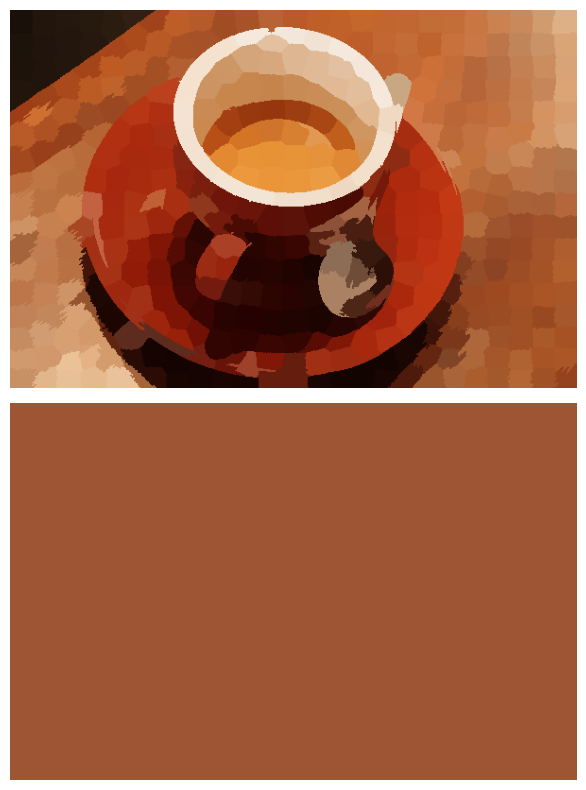

In [5]:
from skimage import data, segmentation, color
from skimage import graph
from matplotlib import pyplot as plt


img = data.coffee()

plt.imshow(img)

labels1 = segmentation.slic(img, compactness=30, n_segments=400,
                            start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

**原理**

对于一张图像$I\in\mathcal{R}^{M\times N}$，对任意两个像素点，都可以衡量其距离

$$d_{ij}=w(i,j)$$

把图像定义成一个图结构，其中，每个节点都是一个像素，像素和像素之间的连线为边。

那么将图像进行分割的问题，就变成了如何将图进行拆分。

即

$$A\cup B =V, A\cap B = \emptyset$$

常规的做法就是，找到一个分割，令下列函数最小

$$cut(A, B) = \sum_{i\in A, j\in B} w_{ij}$$

然而，这种方式会使得较为边缘的区域被单独分割出来。(数据分布不均衡)

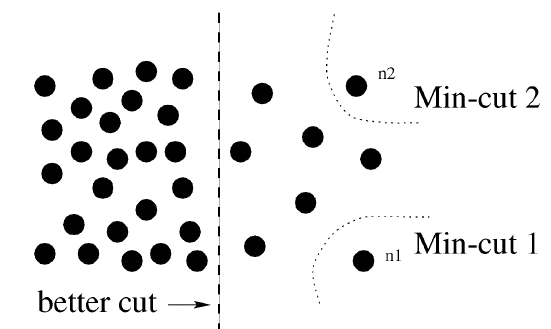

所以，normalized cut算法改进了优化函数，提出了一种归一化距离的方式。

定义总体的距离损失为

$$accoc(A, V)=\sum_{i\in A, j\in B}w_{ij}$$

从而可定义损失函数

$$Ncut(A, B)=\frac{cut(A, B)}{cut(A, B) + assoc(A, V)} + \frac{cut(A, B)}{cut(A, B) + assoc(B, V)}$$

## 深度学习的语义分割

### 数据集

* coco数据集：20万张标注数据，150万个对象实例，171个类别

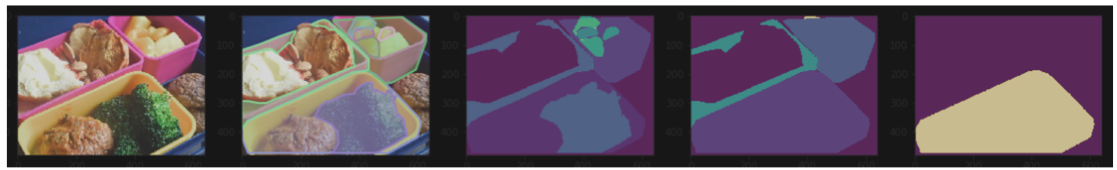

* human parsing dataset: 25403张图像，包含背景共59个类别

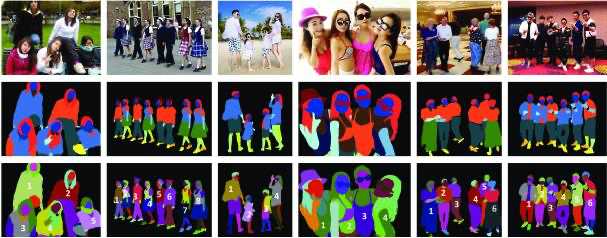

* cityscapes: 30类，5000张细致标注数据，20000张精细标注数据

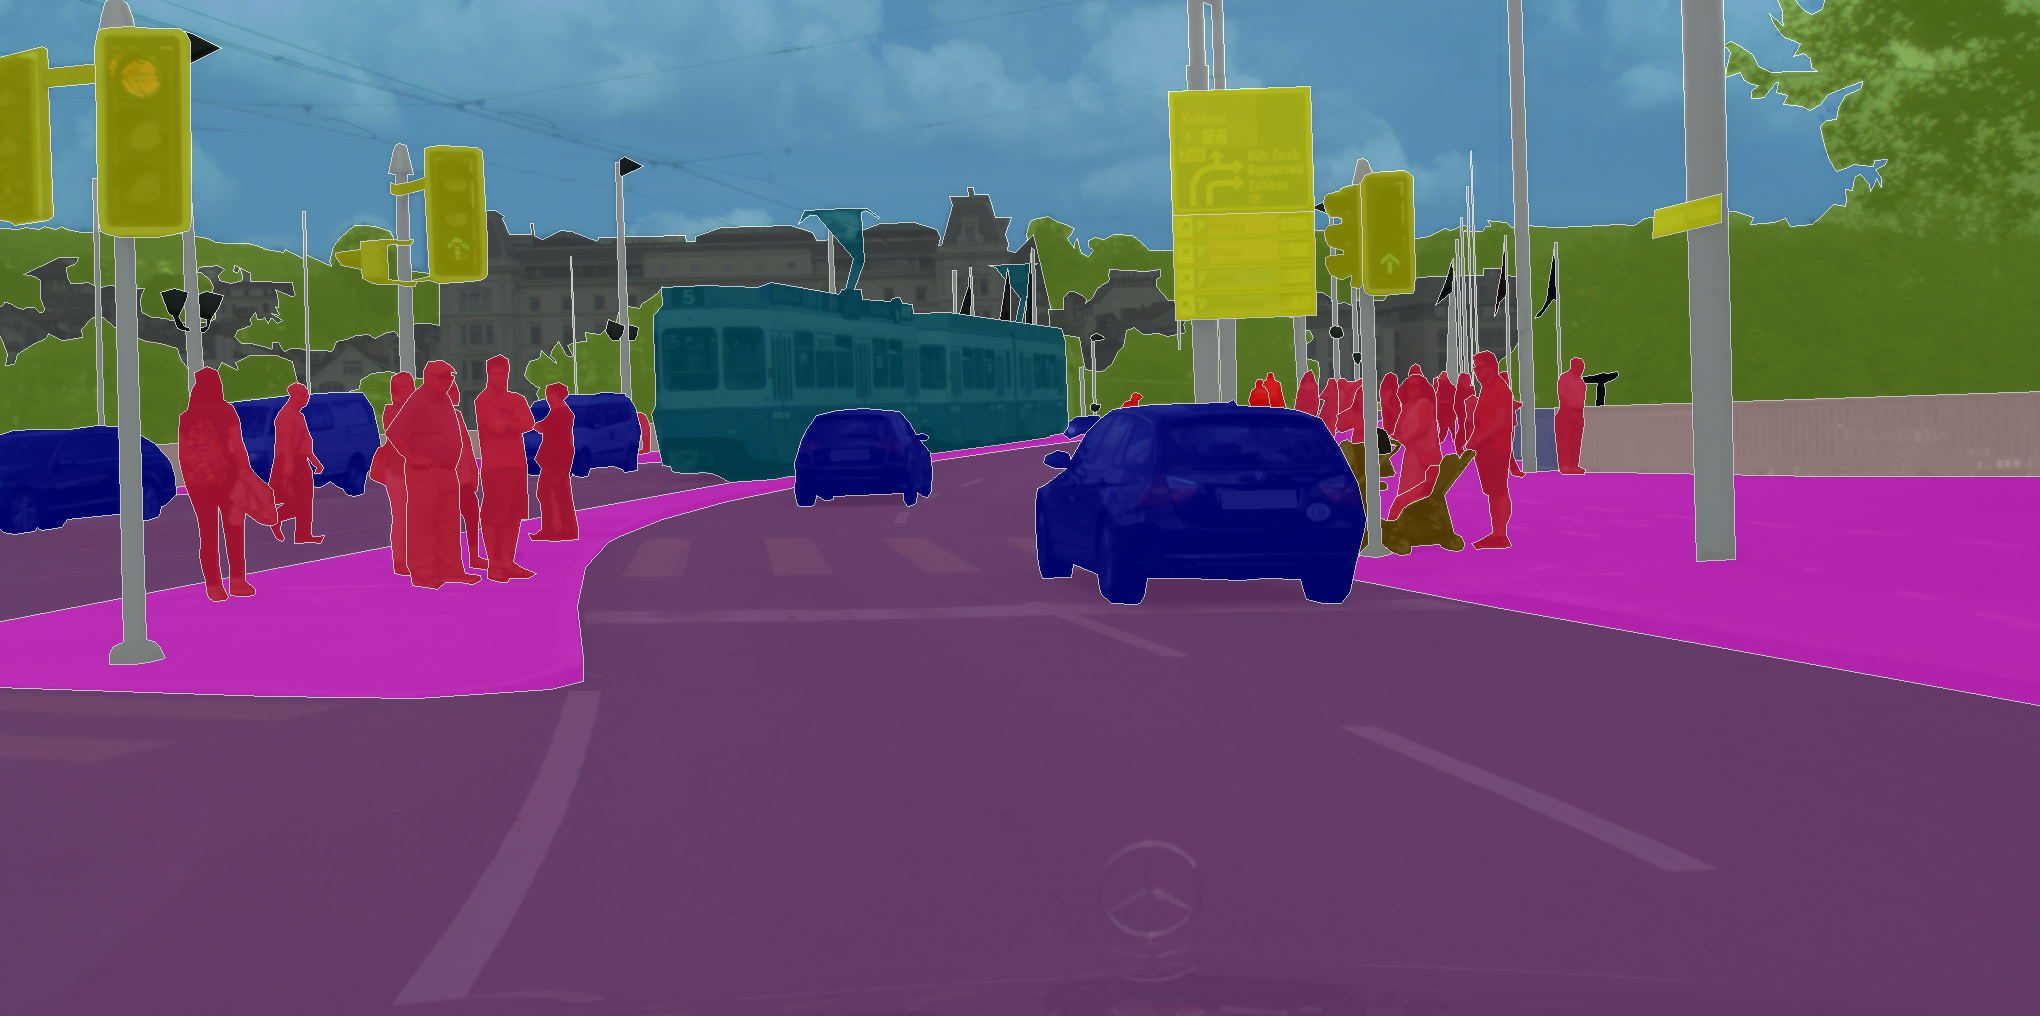

## 评价指标

* 执行时间

* 占用内容

* 准确度(ACC)

对于一张图像，得到一个mask，其中任意的像素点来说：

    - 预测结果为i，真实结果为j，记为$p_{ij}$
    
那么正确分类的像素点的比例为：

$$PA = \frac{\sum p_{ii}}{\sum p_{ij}}$$

* MAP: 计算每一类中的正确分类的像素点的比例，然后求平均

$$mAP = \frac{1}{k}\sum_{i=1}^k \frac{p_{ii}}{p_{ij}}$$

